### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read data

In [2]:
file_path = Path("../Resources/tech_stocks_closing_value_2018.csv")
tech_stocks = pd.read_csv(file_path, index_col='Date', parse_dates=True)
tech_stocks.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-01-02,168.339050,84.128128,1065.000000,181.419998,1189.010010
2018-01-03,168.309738,84.519646,1082.479980,184.669998,1204.199951
2018-01-04,169.091522,85.263542,1086.400024,184.330002,1209.589966
2018-01-05,171.016678,86.320648,1102.229980,186.850006,1229.140015
2018-01-08,170.381485,86.408737,1106.939941,188.279999,1246.869995


### Calculate Daily Returns

In [5]:
# Compute daily returns
daily_returns = tech_stocks.pct_change()
daily_returns.head()
# tech_stocks.info()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.004654,0.016413,0.017914,0.012775
2018-01-04,0.004645,0.008801,0.003621,-0.001841,0.004476
2018-01-05,0.011385,0.012398,0.014571,0.013671,0.016163
2018-01-08,-0.003714,0.001020,0.004273,0.007653,0.014425


### Calcualte standard deviation using `std` function

In [7]:
# Daily Standard Deviations
daily_std = daily_returns.std()
daily_std


AAPL    0.018106
MSFT    0.017839
GOOG    0.017724
FB      0.023949
AMZN    0.022768
dtype: float64

### Sort standard deviation in desc order

In [8]:
# Identify the stock with the most risk
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

FB      0.023949
AMZN    0.022768
AAPL    0.018106
MSFT    0.017839
GOOG    0.017724
dtype: float64

### Calculate the annualized standard deviation

In [9]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std.head()


FB      0.380172
AMZN    0.361434
AAPL    0.287428
MSFT    0.283180
GOOG    0.281354
dtype: float64

### Plot standard deviation for 3 different portfolios to determine which has the most risk

<AxesSubplot:ylabel='Frequency'>

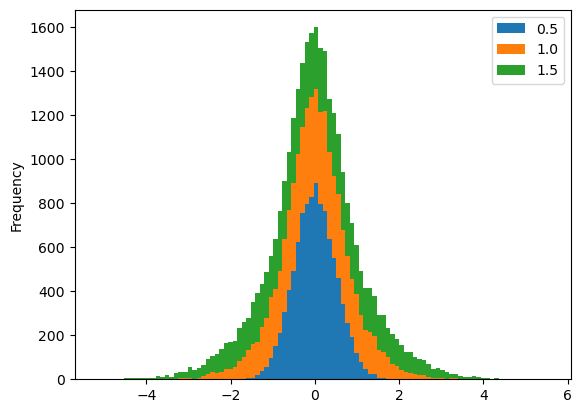

In [10]:
portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

### Plot standard deviation using box plot

<AxesSubplot:>

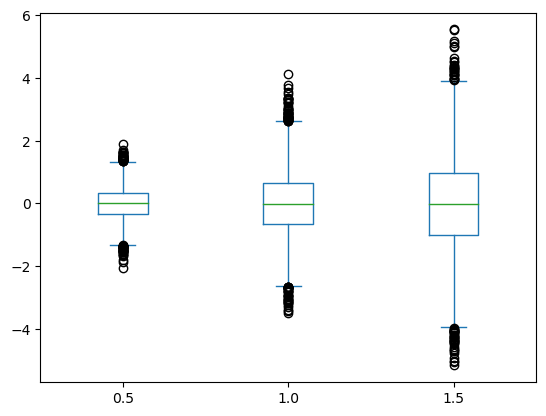

In [11]:
# Plot box plot
portfolio_std.plot.box()
